In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install numpy


Start date: 2022-06-10 19:09:31     
End date: 2022-06-08 21:05:19

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import nltk
from datetime import datetime

In [3]:
# Will read in as a dict
with open('reddit_ni_new_data.json') as outfile:
    reddit_dict = json.load(outfile)

type(reddit_dict) # Checking type

dict

In [4]:
# reddit_dict

In [5]:
# Get the start and end `created` dates
created = reddit_dict['created']
created_list = list(created.values())
created_start = int(created_list[0])
created_end = int(created_list[-1])

# Convert from unix time to datetime
start_datetime = datetime.fromtimestamp(created_start).strftime('%Y-%m-%d %H:%M:%S')
end_datetime = datetime.fromtimestamp(created_end).strftime('%Y-%m-%d %H:%M:%S')

In [6]:
start_datetime

'2022-06-11 20:01:52'

In [7]:
end_datetime

'2022-06-01 23:11:17'

In [8]:
reddit_df = pd.DataFrame(reddit_dict)

In [9]:
reddit_df.head()

,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
0,1.654974e+09,0.0,MoeKara,For context I'm hearing Ben Lowry say the form...,Is it pronounced 'trickle-er' or 'tri-colour'?,3.0,northernireland,3.0,1.00,https://www.reddit.com/r/northernireland/comme...
1,1.654973e+09,0.0,louthlad86,,Cross Community Fleg Seller on Facebook.,3.0,northernireland,3.0,0.80,https://i.redd.it/i7n9boele1591.jpg
2,1.654972e+09,0.0,Tornadoninja-6531,,What if the troubles started again today?,0.0,northernireland,0.0,0.17,https://www.reddit.com/r/northernireland/comme...
3,1.654971e+09,0.0,Druids,"Hi all, I’m sure all of you know the times are...","[Advice] Money is tight, worth getting into De...",1.0,northernireland,1.0,1.00,https://www.reddit.com/r/northernireland/comme...
4,1.654971e+09,0.0,johnnybear9,So my neighbour's gardener has started cutting...,Cutting half the top of a hedge.,2.0,northernireland,2.0,0.75,https://www.reddit.com/r/northernireland/comme...


In [10]:
reddit_df.shape

(500, 10)

In [11]:
# Get the keys of the dict
keys = reddit_df.keys() 
print(keys)

Index(['created', 'downs', 'post_author', 'post_content', 'post_title',
       'score', 'subreddit', 'ups', 'upvote_ratio', 'url'],
      dtype='object')


I want to get a list of the individual authors. I'm going to use the `dict`.

In [12]:
# unique_authors = set(reddit_df['post_author'].values())
unique_authors = set(reddit_dict['post_author'].values())
len(unique_authors)

361

In [13]:
# Convert set to df
unique_authors_df = pd.DataFrame(unique_authors)
unique_authors_df.columns = ["post_author"]
# unique_authors_df

Since every post will need a title, we can see how many posts we have but look at the number of titles

In [14]:
titles = set(reddit_dict['post_title'].values())
len(titles)

498

In [15]:
# titles

In [16]:
from collections import Counter

name_freq = []
list_names = ('bob', 'bill', 'jim', 'john', 'bob')

for names in list_names:

    name_freq.append(names)

# print(Counter(name_freq).most_common(3))
type(list_names)

tuple

I would like to know, first off, who has created the most posts in my dataset

In [17]:
author_list = []
author_list = reddit_df['post_author'].to_list()
# author_list = tuple(author_list)
type(author_list)

list

In [18]:
from collections import Counter, defaultdict
counts = Counter(author_list).most_common()
# len(counts)
# counts
# type(counts)

In [19]:
post_df = pd.DataFrame.from_dict(reddit_dict)
# post_df.head(10)

In [20]:
post_df_sorted_by_author = post_df.sort_values(by="post_author", ascending=True)
post_df_sorted_by_author.head()



,created,downs,post_author,post_content,post_title,score,subreddit,ups,upvote_ratio,url
212,1.654600e+09,0.0,1207travis,"Hello all, planning on taking a solo wild camp...",wild camping in NI for beginners,2.0,northernireland,2.0,0.58,https://www.reddit.com/r/northernireland/comme...
354,1.654354e+09,0.0,123finebyme,,Lee Marvin,129.0,northernireland,129.0,0.95,https://i.redd.it/gw27tawf9m391.jpg
118,1.654764e+09,0.0,1888SEAN,,Poster showing solidarity to the 1981 Hunger S...,123.0,northernireland,123.0,0.79,https://i.redd.it/9hrzfmew6k491.jpg
445,1.654200e+09,0.0,20captainx12,,Alright- which one of yis was this,53.0,northernireland,53.0,0.90,https://i.redd.it/2tarw8spk9391.png
146,1.654707e+09,0.0,3party,,NI Protocol: 'Historic low point' if UK unilat...,34.0,northernireland,34.0,0.95,https://www.bbc.co.uk/news/world-europe-61730258


In [21]:
post_df_sorted_by_upvote = post_df.sort_values(by="ups", ascending=False)
# post_df_sorted_by_upvote.head()

In [22]:
capt = post_df.loc[post_df.post_author == "CaptianSpice"]
# capt.head(50)

In [23]:
author_title_df = post_df.loc[:,['post_author','post_title']]
author_title_df.size
# I'm not sure yet why this is the size it is
# author_title_df.head(50)

1000

In [24]:
# author_title_df['post_author']

In [25]:
# len(author_title_df)

In [26]:
# unique_authors_df.columns = ["post_author"]
res = pd.merge(author_title_df, unique_authors_df, on='post_author', how="inner")
# author_title_df.columns
# unique_authors_df.columns


In [27]:
# res.head()

In [28]:
# Get the frequency of posters over data period
author_post_freq = res['post_author'].value_counts()
# author_post_freq

The top three posters over the dates I have data for are `CaptianSpice`, `Paddy_Irishman_` and `Tornadoninja-6531`.      

First, we will look at `CaptianSpice`

In [29]:
# Gather the index values of the posts by CaptainSpice
CaptianSpice_post_index = post_df.index[post_df['post_author'] == 'CaptianSpice'].tolist()

# type(CaptianSpice_post_index)
# len(CaptianSpice_post_index)


In [30]:
CaptianSpice_title_holder = []
for x in range(len(CaptianSpice_post_index)):
    capt_res = post_df['post_title'].iloc[int(CaptianSpice_post_index[x])]
    CaptianSpice_title_holder.append(capt_res)

In [31]:
# CaptianSpice_title_holder

In [32]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_title_holder)
# CaptianSpice_title_word_freq

From the above, I need to split each sentence into workds

In [33]:
CaptianSpice_word_bag = ' '.join(CaptianSpice_title_holder).split()
# CaptianSpice_word_bag

In [34]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_word_bag)
# CaptianSpice_title_word_freq.values()

Trying a different apprach to getting my sentences into words

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Seán\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# word_tokens = word_tokenize(CaptianSpice_title_holder)

Nope. Tokenizer didn't work. Now I will try and remove the `stopwords` using a different method

In [37]:
CaptianSpice_word_bag_filtered = []

for w in CaptianSpice_word_bag:
    if w not in stop_words:
        CaptianSpice_word_bag_filtered.append(w)
len(CaptianSpice_word_bag_filtered)

229

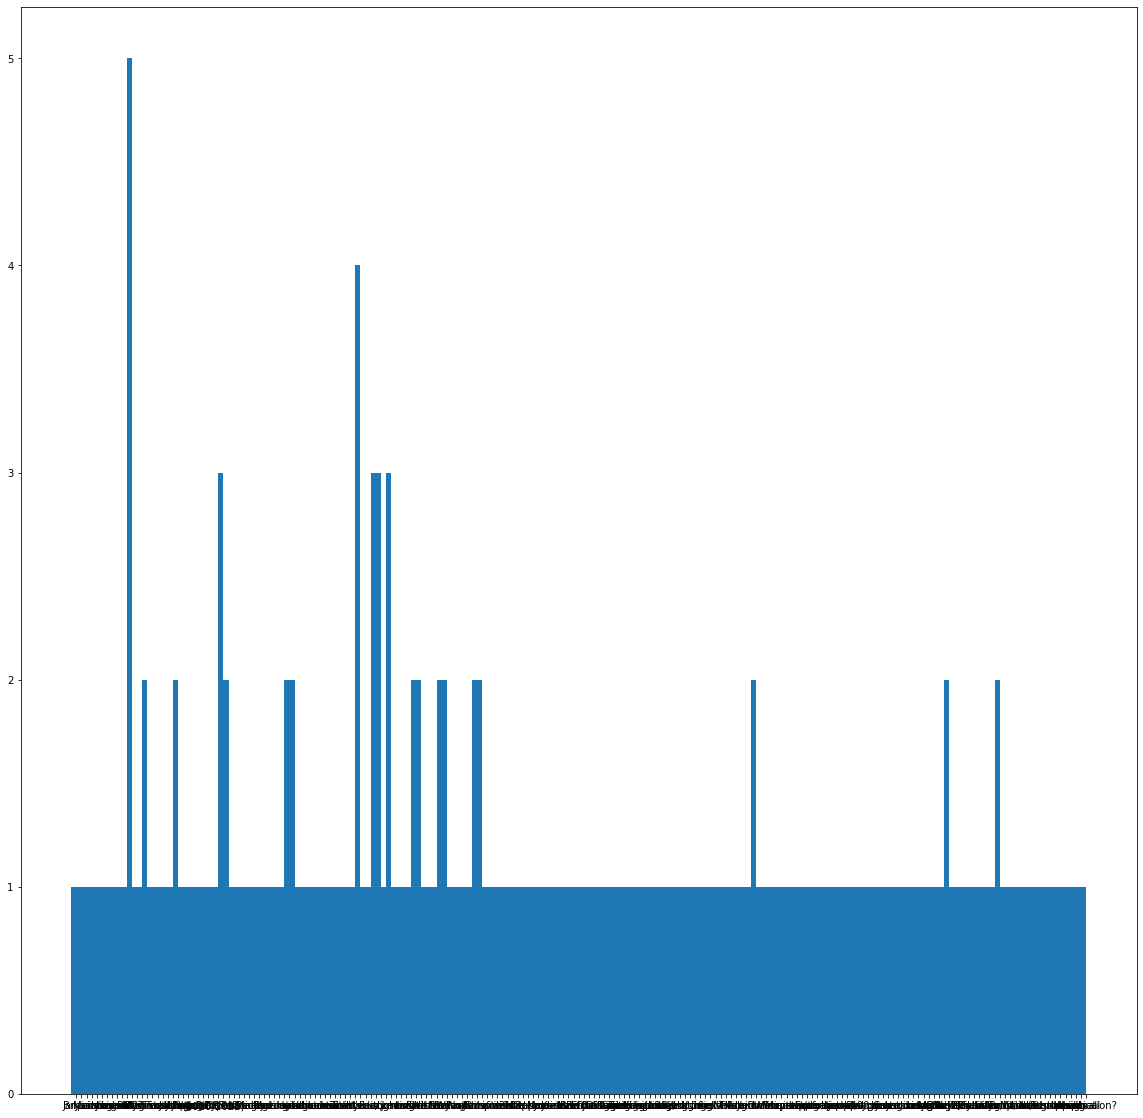

In [38]:
cs_counted_words = Counter(CaptianSpice_word_bag_filtered)

labels, values = zip(*cs_counted_words.items())
indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)

plt.show()

In [39]:
# cs_counted_words.values()

In [40]:
meh = []
for x in range(len(cs_counted_words.values())):
    if cs_counted_words.values > 1:
        print(cs_counted_words.items(x))

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'int'

Now I will try and look at the post content for the authors

In [ ]:
# CaptianSpice post content
author_content_df = post_df.loc[:,['post_author','post_content']]
# author_content_df

We can see that not every post contains content in the post body

In [ ]:
author_content_df.head()

In [ ]:
# Try and get the post contents for CaptianSpice
# We already have the post index for the Captian - # Gather the index values of the posts by CaptainSpice -- CaptianSpice_post_index
CaptianSpice_content_holder = []
for y in range(len(CaptianSpice_post_index)):
    CaptianSpice_post_content_df = post_df['post_content'].iloc[int(CaptianSpice_post_index[y])]
    CaptianSpice_content_holder.append(CaptianSpice_post_content_df)
# CaptianSpice_content_holder

In [ ]:
len(CaptianSpice_title_holder)

CaptianSpice has, essentially, posted very little content. Of the 27 posts they have made, only two seem to contain any content in the body of the post, and those tow seem to be related to polls. 

It may be interesting, for the moment, to focus on `CaptianSpice`.

In [ ]:
"""
# random.shuffle(CaptianSpice_title_holder)

# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = list(stopwords.words('english'))
# stop_words

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href"])
textt = " ".join(review for review in CaptianSpice_title_holder)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
"""